In [31]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta

In [32]:
emp_id=[f"EMP{i:05d}" for i in range(1,31)]

In [33]:
dates=pd.date_range(start="2025-07-01",periods=30,freq='D')

In [34]:
records=[]
for emp in emp_id:
    for date in dates:
        hours=np.random.uniform(4,10)
        records.append([emp,date,round(hours,2)])

In [35]:
df=pd.DataFrame(records,columns=["EmployeeID","Date","Working Hours"])

In [36]:
# Group by EmployeeID and calculate total & average
emp_summary = df.groupby("EmployeeID")["Working Hours"].agg(TotalHours="sum",AverageHours="mean").reset_index()
print(emp_summary)


   EmployeeID  TotalHours  AverageHours
0    EMP00001      207.67      6.922333
1    EMP00002      205.54      6.851333
2    EMP00003      203.37      6.779000
3    EMP00004      198.67      6.622333
4    EMP00005      208.83      6.961000
5    EMP00006      203.75      6.791667
6    EMP00007      211.60      7.053333
7    EMP00008      211.06      7.035333
8    EMP00009      209.69      6.989667
9    EMP00010      197.04      6.568000
10   EMP00011      201.88      6.729333
11   EMP00012      217.01      7.233667
12   EMP00013      218.32      7.277333
13   EMP00014      212.88      7.096000
14   EMP00015      213.08      7.102667
15   EMP00016      202.50      6.750000
16   EMP00017      204.87      6.829000
17   EMP00018      211.43      7.047667
18   EMP00019      216.12      7.204000
19   EMP00020      206.08      6.869333
20   EMP00021      203.36      6.778667
21   EMP00022      212.32      7.077333
22   EMP00023      208.00      6.933333
23   EMP00024      217.56      7.252000


In [37]:
# Group by Date and calculate total working hours that day
daily_summary = df.groupby("Date")["Working Hours"].sum().reset_index()
daily_summary.columns = ["Date", "TotalHours"]

print(daily_summary)


         Date  TotalHours
0  2025-07-01      206.54
1  2025-07-02      208.15
2  2025-07-03      212.85
3  2025-07-04      224.07
4  2025-07-05      198.37
5  2025-07-06      226.42
6  2025-07-07      203.42
7  2025-07-08      216.92
8  2025-07-09      197.99
9  2025-07-10      202.71
10 2025-07-11      199.03
11 2025-07-12      212.88
12 2025-07-13      204.98
13 2025-07-14      202.13
14 2025-07-15      207.17
15 2025-07-16      216.33
16 2025-07-17      189.37
17 2025-07-18      208.63
18 2025-07-19      208.63
19 2025-07-20      215.93
20 2025-07-21      222.73
21 2025-07-22      214.86
22 2025-07-23      204.47
23 2025-07-24      196.84
24 2025-07-25      206.23
25 2025-07-26      214.76
26 2025-07-27      188.12
27 2025-07-28      211.80
28 2025-07-29      188.28
29 2025-07-30      202.39


In [38]:
# Filter employees with low or high average hours
low_avg = emp_summary[emp_summary["AverageHours"] < 5]
high_avg = emp_summary[emp_summary["AverageHours"] > 9]

print("Employees with low average hours (< 5):")
print(low_avg)

print("\nEmployees with high average hours (> 9):")
print(high_avg)


Employees with low average hours (< 5):
Empty DataFrame
Columns: [EmployeeID, TotalHours, AverageHours]
Index: []

Employees with high average hours (> 9):
Empty DataFrame
Columns: [EmployeeID, TotalHours, AverageHours]
Index: []


In [39]:
print(df.describe())

                                Date  Working Hours
count                            900     900.000000
mean   2025-07-15 12:00:00.000000256       6.903333
min              2025-07-01 00:00:00       4.000000
25%              2025-07-08 00:00:00       5.377500
50%              2025-07-15 12:00:00       6.970000
75%              2025-07-23 00:00:00       8.292500
max              2025-07-30 00:00:00      10.000000
std                              NaN       1.727230


In [44]:
print(df.dtypes)

EmployeeID               object
Date             datetime64[ns]
Working Hours           float64
dtype: object


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

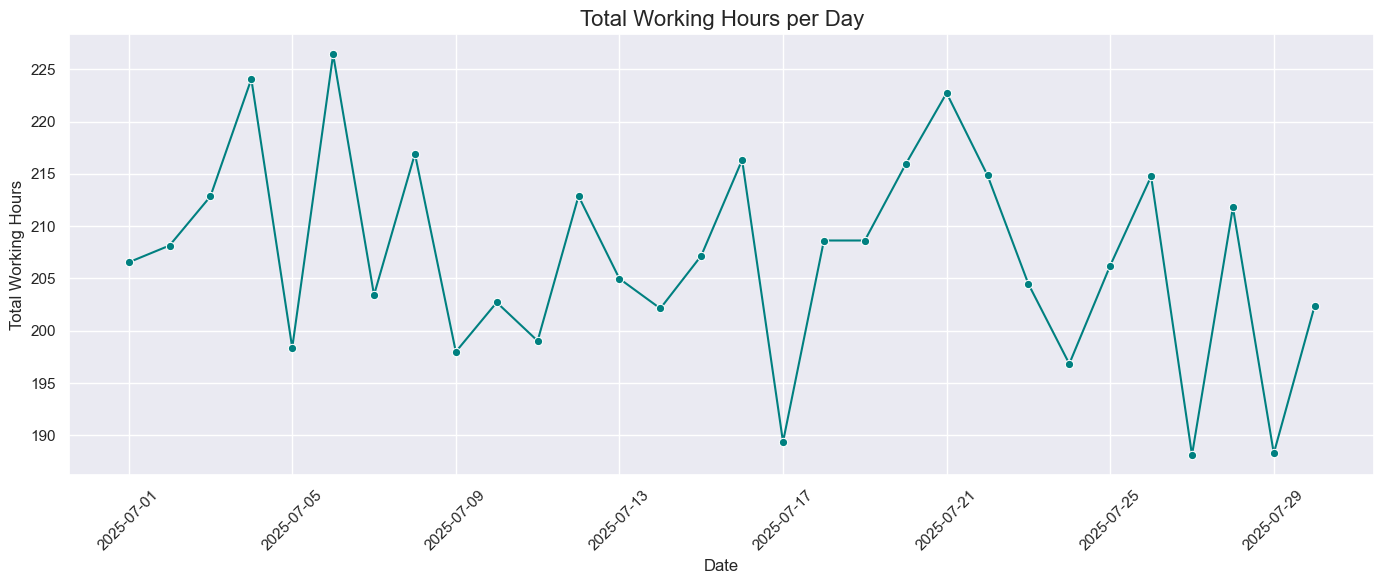

In [42]:

sns.set(style="darkgrid")

# Plot the line chart
plt.figure(figsize=(14, 6))
sns.lineplot(x="Date", y="TotalHours", data=daily_summary, marker="o", color="teal")

# Chart labels and formatting
plt.title("Total Working Hours per Day", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Working Hours")
plt.xticks(rotation=45)  # Rotate date labels
plt.tight_layout()
plt.show()


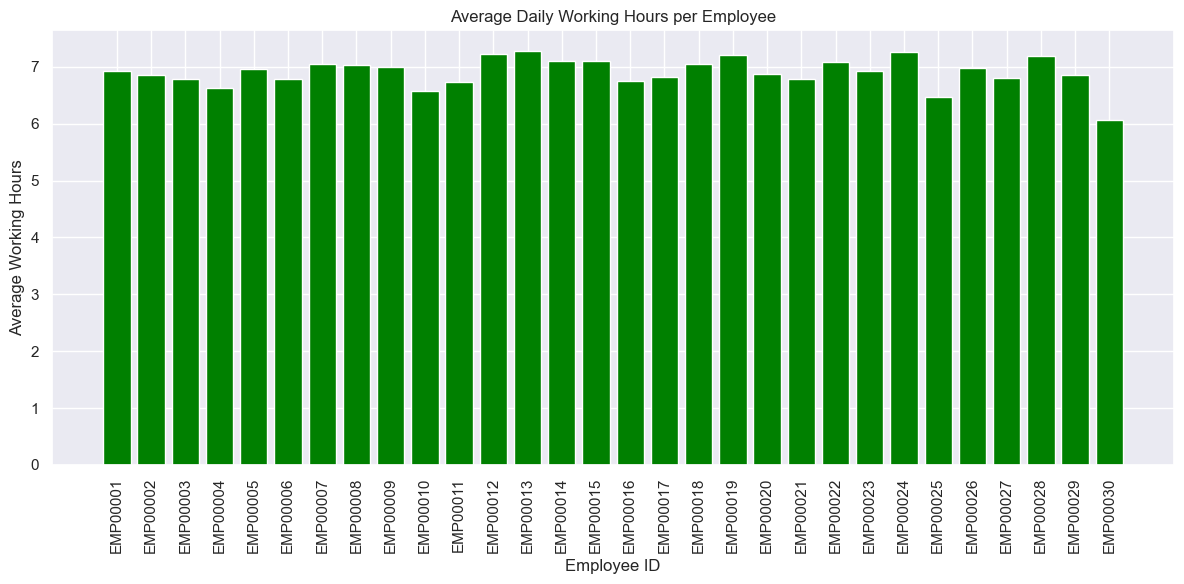

In [43]:
emp_summary_sorted = emp_summary.sort_values(by="EmployeeID", ascending=True)

# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(emp_summary_sorted["EmployeeID"], emp_summary_sorted["AverageHours"], color="green")

# Labels and title
plt.xlabel("Employee ID")
plt.ylabel("Average Working Hours")
plt.title("Average Daily Working Hours per Employee")
plt.xticks(rotation=90)  # Rotate x-axis labels

# Show plot
plt.tight_layout()
plt.show()